In [ ]:
import joblib
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Importing Zip File


In [ ]:
!gdown --id 1bE2eCG0CfGFjaCph_Dphi2El6WZtf5N4



/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bE2eCG0CfGFjaCph_Dphi2El6WZtf5N4
To: /content/images.zip
100% 298M/298M [00:01<00:00, 248MB/s]


# Extracting folders from the zip file


*   A cursory look at the dataset





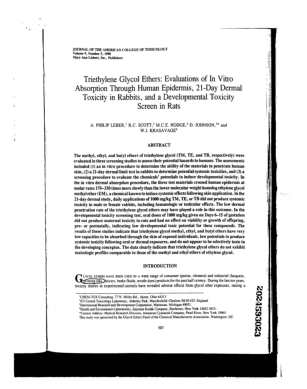

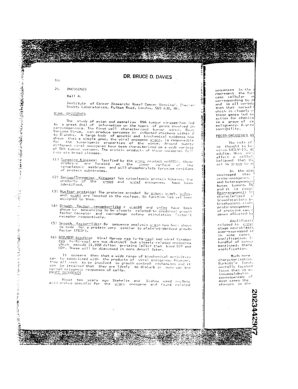

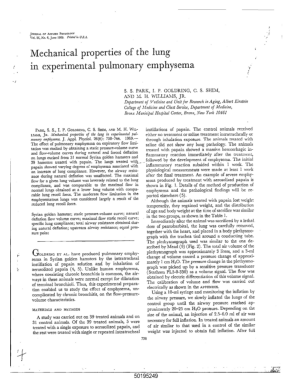

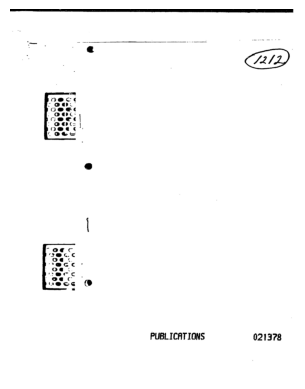

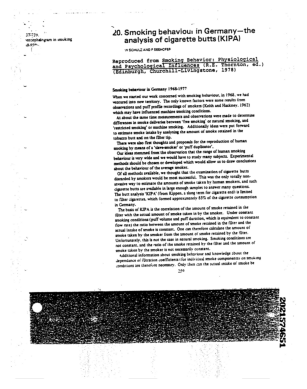

In [ ]:
import zipfile
import os
import cv2
import matplotlib.pyplot as plt

zip_path = '/content/images.zip'

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images_extracted/')

# Get a list of extracted image file paths
extracted_images = []
for root, dirs, files in os.walk('/content/images_extracted/images'):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
            extracted_images.append(os.path.join(root, file))

# Display extracted images
for image_path in extracted_images[: 5]:
    img = cv2.imread(image_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read: {image_path}")





# Exploratory Data Analysis
*   Inspecting the image dimensions and it's variation in the dataset
*   Visualizing the variation through histogram plot








Subfolder: 6
Subfolder: 2
Subfolder: 4
Subfolder: 9
Subfolder: 0


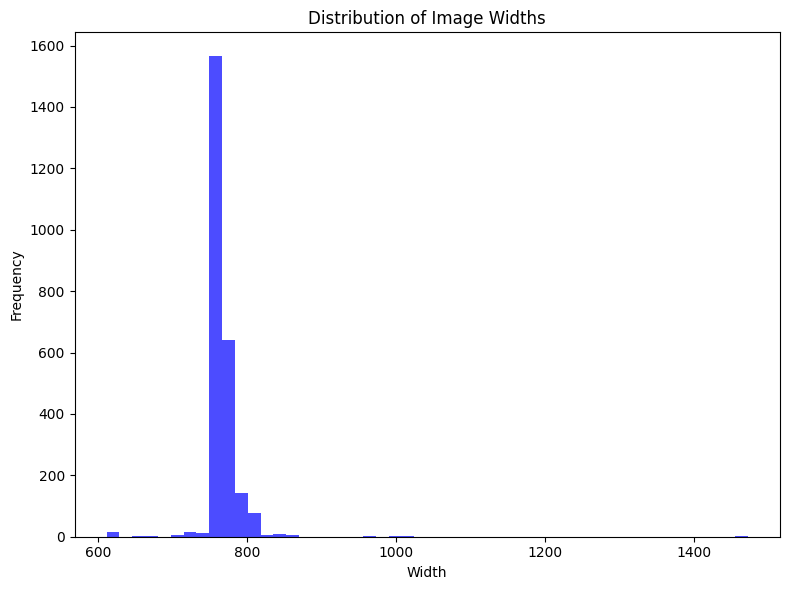

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

img_folder = '/content/images_extracted/images/'

all_widths = []

subfolders = os.listdir(img_folder)

# Iterate through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(img_folder, subfolder)

    # Check if the item is a directory
    if os.path.isdir(subfolder_path):
        print(f"Subfolder: {subfolder}")

        # Get a list of image files
        image_files = os.listdir(subfolder_path)

        # Iterate through each image in the subfolder
        for image_file in image_files:
            image_path = os.path.join(subfolder_path, image_file)

            # Read the image using OpenCV
            img = cv2.imread(image_path)
            if img is not None:
                height, width, _ = img.shape
                all_widths.append(width)
            else:
                print(f"    Failed to read image: {image_file}")

# Plotting the variation of widths using a histogram
plt.figure(figsize=(8, 6))
plt.hist(all_widths, bins=50, alpha=0.7, color='blue')

plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Distribution of Image Widths')
plt.tight_layout()
plt.show()




# Preprocessing


*  Resizing images to a standard size
*  Applying contrast enhancement and normalization



In [ ]:
import cv2
import os
import shutil


data_folder = '/content/images_extracted/images/'
output_folder = '/content/processed_images'

os.makedirs(output_folder, exist_ok=True)

def preprocess_images(input_folder, output_folder):

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    for subdir, _, files in os.walk(input_folder):
        for file in files:
            file_path = os.path.join(subdir, file)
            img = cv2.imread(file_path)

            if img is not None:
                # Resize to a specific size
                resized_img = cv2.resize(img, (256, 256))

                # Convert to grayscale
                gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

                # Apply CLAHE for contrast enhancement
                enhanced_img = clahe.apply(gray_img)

                # Normalize pixel values (e.g., 0-1 range)
                normalized_img = gray_img.astype('float32') / 255.0

                # Maintain subfolder structure when saving processed images
                relative_path = os.path.relpath(subdir, input_folder)
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)
                output_path = os.path.join(output_subfolder, file)

                # Save preprocessed image to output folder
                cv2.imwrite(output_path, resized_img)
            else:
                print(f"Failed to read image: {file_path}")

# Apply preprocessing to the dataset
preprocess_images(data_folder, output_folder)


In [ ]:
pip install imagecodecs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 7.5 MB/s eta 0:00:00


# Result of Preprocessing and it's Comparison

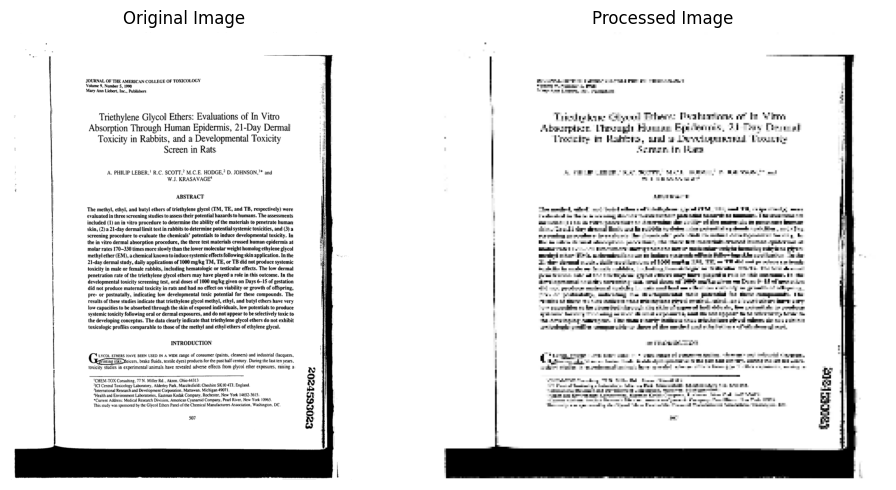

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

data_folder = '/content/images_extracted/images/'
processed_images_folder = '/content/processed_images'

def load_tiff_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return img


first_processed_image = None
for root, dirs, files in os.walk(processed_images_folder):
    if files:
        first_processed_image = os.path.join(root, files[0])
        break

first_original_image = None
if first_processed_image:
    image_name = os.path.basename(first_processed_image)
    subfolder_name = os.path.basename(os.path.dirname(first_processed_image))
    corresponding_original_path = os.path.join(data_folder, subfolder_name, image_name)
    if os.path.exists(corresponding_original_path):
        first_original_image = corresponding_original_path

# Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

if first_original_image:
    original_img = load_tiff_image(first_original_image)
    axes[0].imshow(original_img, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

if first_processed_image:
    processed_img = load_tiff_image(first_processed_image)
    axes[1].imshow(processed_img, cmap='gray')
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

plt.tight_layout()
plt.show()





# Detecting Anomalies in the dataset


*   In this case, dark edges with a certain thickness.



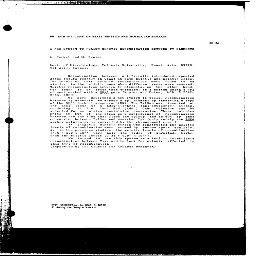

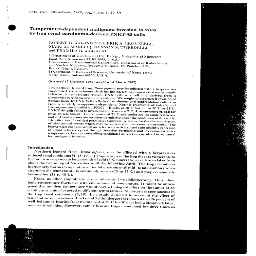

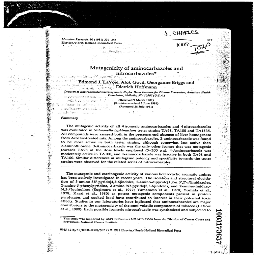

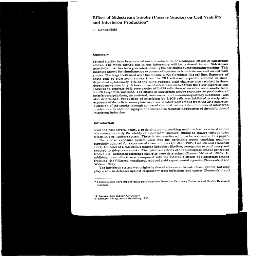

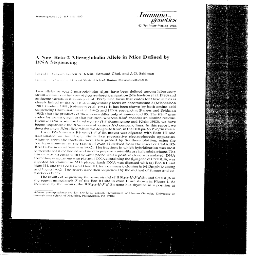

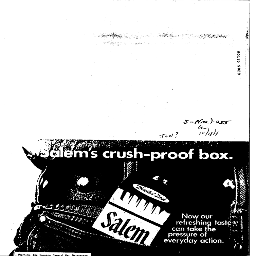

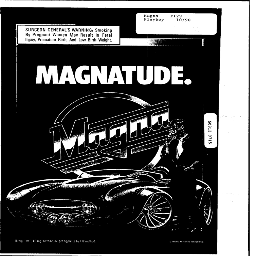

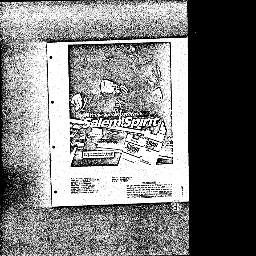

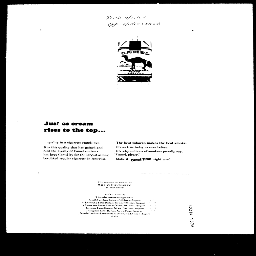

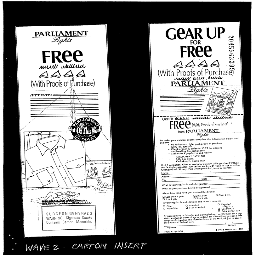

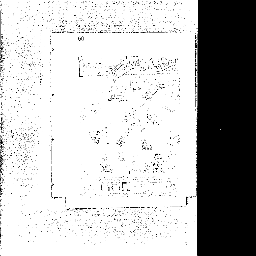

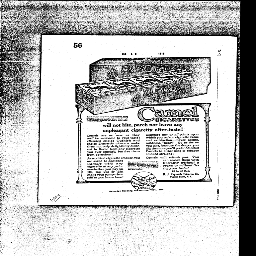

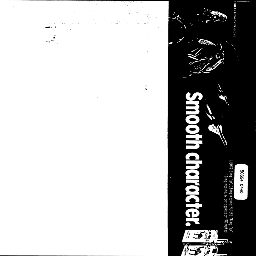

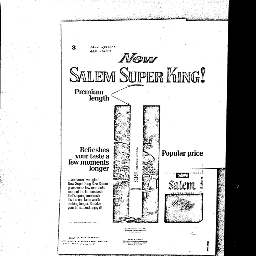

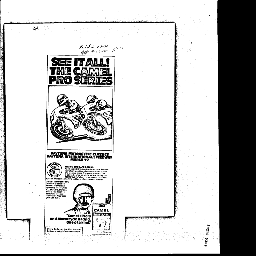

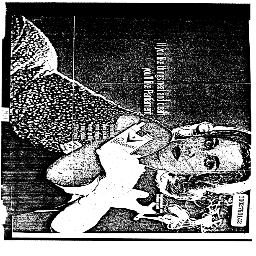

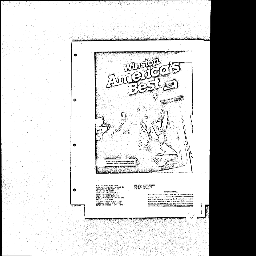

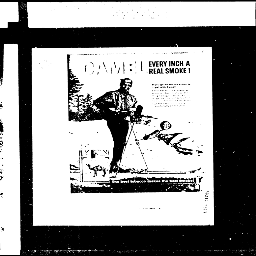

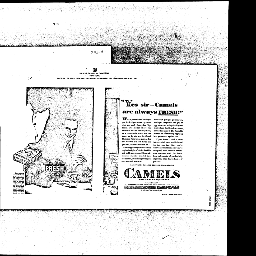

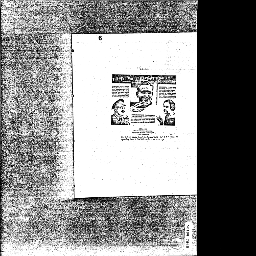

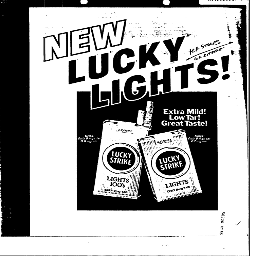

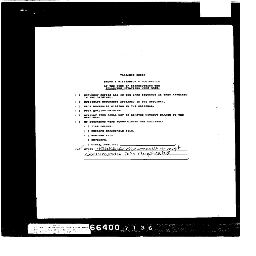

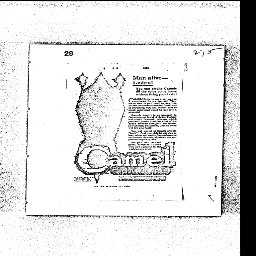

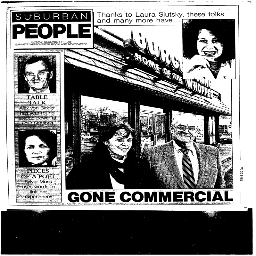

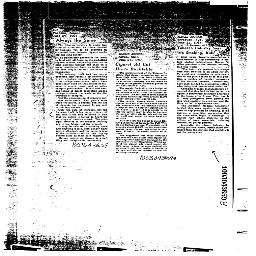

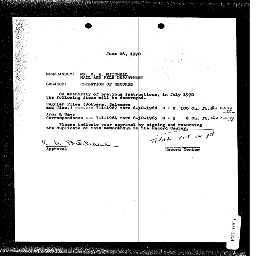

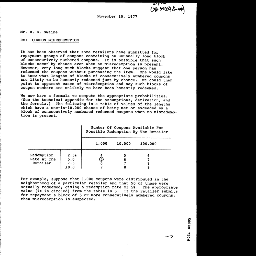

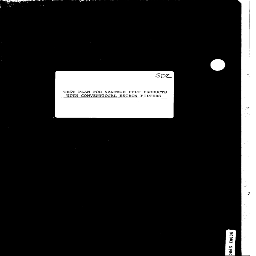

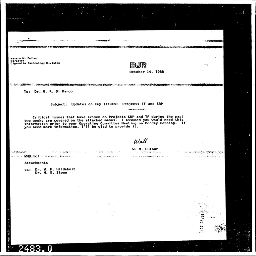

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os

def detect_dark_edges(image_folder, threshold=50, edge_thickness=20):
    dark_edge_images = []

    for subdir, _, files in os.walk(image_folder):
        for file in files:
            file_path = os.path.join(subdir, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            # Calculate mean pixel intensity along the edges
            top_mean = img[:edge_thickness, :].mean()
            bottom_mean = img[-edge_thickness:, :].mean()
            left_mean = img[:, :edge_thickness].mean()
            right_mean = img[:, -edge_thickness:].mean()

            if top_mean < threshold or bottom_mean < threshold or left_mean < threshold or right_mean < threshold:
                dark_edge_images.append(file_path)

    return dark_edge_images

def display_detected_images(images_list):
    for image_path in images_list:
        img = cv2.imread(image_path)
        cv2_imshow(img)

image_folder = '/content/processed_images'

# Detect images with thick dark edges
dark_edge_images_list = detect_dark_edges(image_folder, threshold=50, edge_thickness=20)

display_detected_images(dark_edge_images_list)




# Removal of the detected anomalies from the dataset

In [ ]:
def move_images_to_folder(image_list, destination_folder):
    os.makedirs(destination_folder, exist_ok=True)
    for image_path in image_list:
        filename = os.path.basename(image_path)
        destination_path = os.path.join(destination_folder, filename)
        try:
            shutil.move(image_path, destination_path)
            print(f"Moved {filename} to {destination_folder}")
        except Exception as e:
            print(f"Failed to move {filename}: {e}")

image_folder = '/content/processed_images'
destination_folder = '/content/discarded_images'

dark_edge_images_list = detect_dark_edges(image_folder, threshold=50, edge_thickness=20)

# Move the identified images to the new folder
move_images_to_folder(dark_edge_images_list, destination_folder)

Moved fc0cfa56-8308-4f79-9370-d325fbdc163e.TIF to /content/discarded_images
Moved f5bd2f60-248d-477c-9e30-63c6d21588fa.TIF to /content/discarded_images
Moved 2bac0cfe-9580-49dc-b06e-8d603c8b9ea4.TIF to /content/discarded_images
Moved 5636706c-a6fd-410b-8b9c-4e83c3023f51.TIF to /content/discarded_images
Moved 1595563c-8733-4e5e-b26c-b6624e9cd78a.TIF to /content/discarded_images
Moved 8221fd71-c0bf-43c2-af2a-379137b21dcb.TIF to /content/discarded_images
Moved 0eff794c-54db-4750-b13e-35fe7db42b49.TIF to /content/discarded_images
Moved 14d38a6f-54c1-47f2-8bdd-3d49a8c7aa9b.TIF to /content/discarded_images
Moved ad7bbbc6-f386-430e-860b-d05e68c7a96b.TIF to /content/discarded_images
Moved 5df6abc6-1ccb-43e1-a4d3-a62b43c97437.TIF to /content/discarded_images
Moved 5258a6d7-4679-485c-85db-fc2cf76588fc.TIF to /content/discarded_images
Moved 5166cea6-3b20-4e6f-a576-8e6538a95864.TIF to /content/discarded_images
Moved eb8bb7ec-ec41-405f-9437-3369d2229f32.TIF to /content/discarded_images
Moved 2b2927

In [ ]:
pip install keras==2.15.0


In [ ]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.layers import Layer, InputSpec



# Model Architecture


*   Addition of custom layers to fine-tune the results



In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2


def VGGupdated(input_tensor=None,classes=5):

    img_rows, img_cols = 256, 256
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1',
               kernel_regularizer=l2(0.001))(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2',
               kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation="relu")(x)
    predictions = Dense(classes, activation="softmax")(x)

    # Model Creation


    model = Model(inputs = img_input, outputs = predictions, name='VGGdemo')


    return model

In [ ]:
model = VGGupdated(classes = 5)




# Model Compilation

In [ ]:
from tensorflow.keras.optimizers import Adam

# Defininig the optimizer separately with a custom learning rate
custom_adam = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=custom_adam, loss='categorical_crossentropy', metrics=['accuracy'])


# Data Preparation before training


*   Building a dataframe and storing labels.
*   Label Encoding and loading images.







In [ ]:
import os
import pandas as pd

def create_dataframe(image_folder):
    document_types = []
    file_names = []

    for subdir, _, files in os.walk(image_folder):
        for file in files:
            file_path = os.path.join(subdir, file)
            if os.path.isfile(file_path):
                document_type = os.path.basename(subdir)
                document_types.append(document_type)
                file_names.append(file)

    # Creating DataFrame
    data = {'Document_Type': document_types, 'Image_File_Name': file_names}
    df = pd.DataFrame(data)
    return df

image_folder = '/content/processed_images'

# Create the DataFrame
document_image_df = create_dataframe(image_folder)

# Displaying the first few rows of the DataFrame
print(document_image_df.head())
print(document_image_df.tail())




  Document_Type                           Image_File_Name
0             6  b6f3f0df-815f-4298-84b2-6499e342043b.TIF
1             6  2497a77a-e6b5-4096-a70d-31268a8348bf.TIF
2             6  dcb8e8c2-f857-416a-9638-8f6842b7751d.TIF
3             6  d9f2cf9a-19c6-42f6-970a-2550671ca3b6.TIF
4             6  bab68d6c-1cad-42f3-9822-ea1899eb7ab7.TIF
     Document_Type                           Image_File_Name
2466             0  564f3b97-100f-49c6-8bbd-41390de1ec2e.TIF
2467             0  c8eebde2-0f5a-4e15-a581-ca4607d9c6a1.TIF
2468             0  ab5f2ea2-5585-416e-bd55-0eb4a11e74de.TIF
2469             0  10ecb54c-ce25-4056-881b-919ca344124a.TIF
2470             0  08786025-80b7-4591-b1ee-2340391d6237.TIF


In [ ]:
from sklearn.preprocessing import OneHotEncoder

y = document_image_df['Document_Type'].values.reshape(-1, 1)  # Reshape to a 2D array
onehotencoder = OneHotEncoder()  # Initialize the OneHotEncoder
Y = onehotencoder.fit_transform(y).toarray()  # Fit and transform 'y', then convert to array
print(Y.shape)




(2471, 5)


In [ ]:
import cv2
import os

image_folder = '/content/processed_images'
image = []

for root, dirs, files in os.walk(image_folder):
    print(f"Root: {root}")
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.TIF', '.tiff')):
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path)
            if img is not None:
                image.append(img)
            else:
                print(f"Failed to read image: {img_path}")

print(f"Total images loaded: {len(image)}")



Root: /content/processed_images
Root: /content/processed_images/6
Root: /content/processed_images/2
Root: /content/processed_images/4
Root: /content/processed_images/9
Root: /content/processed_images/0
Total images loaded: 2471


# Splitting The Dataset


*   Performing a split into train, test and validation sets



In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np



image, Y = shuffle(image, Y, random_state=1)

# Splitting into 80-10-10 train, test, and validation sets
train_ratio = 0.8
val_test_ratio = 0.5  # Splits remaining 20% into equal parts for validation and test (10% each)
train_x, test_val_x, train_y, test_val_y = train_test_split(image, Y, test_size=1 - train_ratio, random_state=415)
val_x, test_x, val_y, test_y = train_test_split(test_val_x, test_val_y, test_size=val_test_ratio, random_state=415)

# Convert lists to NumPy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)
val_x = np.array(val_x)
val_y = np.array(val_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

# Inspecting the shape of the training, validation, and testing sets
print("Train set shapes:", train_x.shape, train_y.shape)
print("Validation set shapes:", val_x.shape, val_y.shape)
print("Test set shapes:", test_x.shape, test_y.shape)


Train set shapes: (1976, 256, 256, 3) (1976, 5)
Validation set shapes: (247, 256, 256, 3) (247, 5)
Test set shapes: (248, 256, 256, 3) (248, 5)


# Model Training


*   Training Accuracy of 86.94% was achieved with the loss value of 0.4.
*   Validation Accuracy of 83.81% was obtained with the loss value of 0.8



In [ ]:

# Train the model
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=10)


Epoch 1/10
62/62 [==============================] - 102s 1s/step - loss: 1.6046 - accuracy: 0.3057 - val_loss: 1.1332 - val_accuracy: 0.5263
Epoch 2/10
62/62 [==============================] - 34s 543ms/step - loss: 1.2308 - accuracy: 0.5450 - val_loss: 0.9401 - val_accuracy: 0.6923
Epoch 3/10
62/62 [==============================] - 34s 553ms/step - loss: 1.0297 - accuracy: 0.6296 - val_loss: 0.7653 - val_accuracy: 0.7652
Epoch 4/10
62/62 [==============================] - 34s 555ms/step - loss: 0.8913 - accuracy: 0.6756 - val_loss: 0.6356 - val_accuracy: 0.7895
Epoch 5/10
62/62 [==============================] - 34s 549ms/step - loss: 0.7551 - accuracy: 0.7434 - val_loss: 0.5496 - val_accuracy: 0.8219
Epoch 6/10
62/62 [==============================] - 34s 554ms/step - loss: 0.6661 - accuracy: 0.7758 - val_loss: 0.5560 - val_accuracy: 0.8381
Epoch 7/10
62/62 [==============================] - 34s 553ms/step - loss: 0.6102 - accuracy: 0.8117 - val_loss: 0.5112 - val_accuracy: 0.8138
E

# Model Performance Analysis


*   Plotting Training vs validation loss
*   Plotting Training vs validation accuracy

    Decrease in loss and increase in accuracy parallely in both train and validation sets after increase in epochs indicated that the model is extracting features






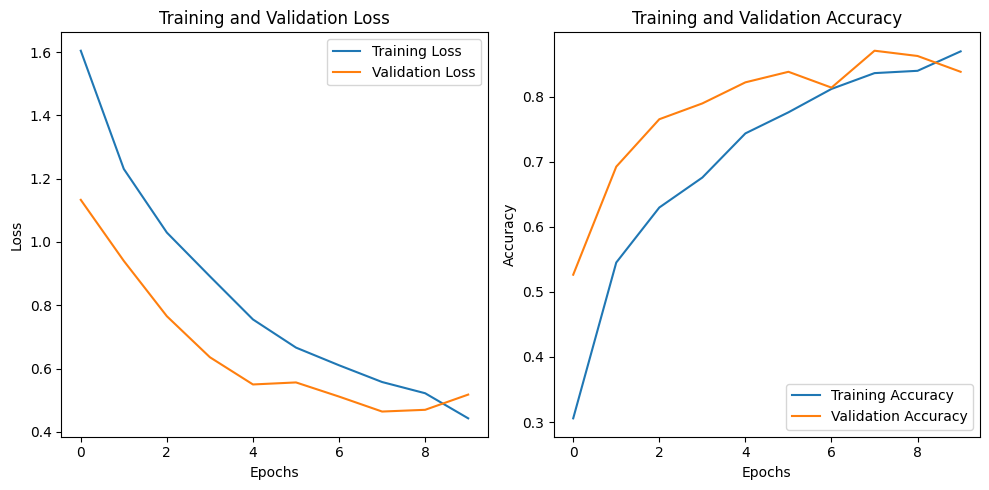

In [ ]:
import matplotlib.pyplot as plt

# Extracting training and validation metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Model Testing

1/1 [==============================] - 0s 22ms/step


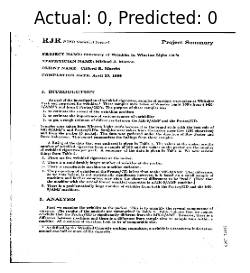

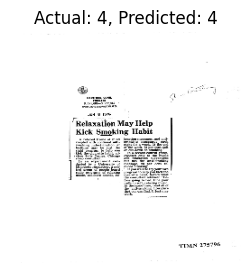

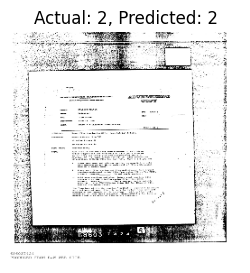

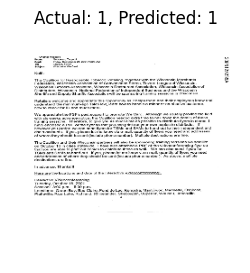

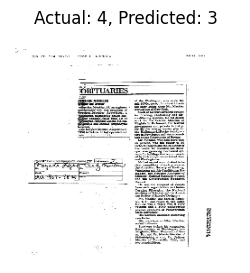

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Randomly select indices
indices = np.random.randint(0, len(test_x), size=5)

# Extract random images and their labels
sample_images = test_x[indices]
sample_labels = test_y[indices]

# Predict on the sample images
predictions = model.predict(sample_images)

# Display actual and predicted outputs
for i in range(len(sample_images)):
    actual_label = np.argmax(sample_labels[i])  # Get the index of the actual label
    predicted_label = np.argmax(predictions[i])  # Get the index of the predicted label

    # Display the image
    plt.figure(figsize=(3, 3))
    plt.imshow(sample_images[i])
    plt.axis('off')
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.show()


# Model Evaluation

* Plotting Confusion Matrix to visualize the following outcomes:


*   Classes 1 and 2 were classified more accurately as compared to the other classes.


*   Classification between classes 3 and 4 produced the most errors(11) and (10).







8/8 [==============================] - 1s 171ms/step


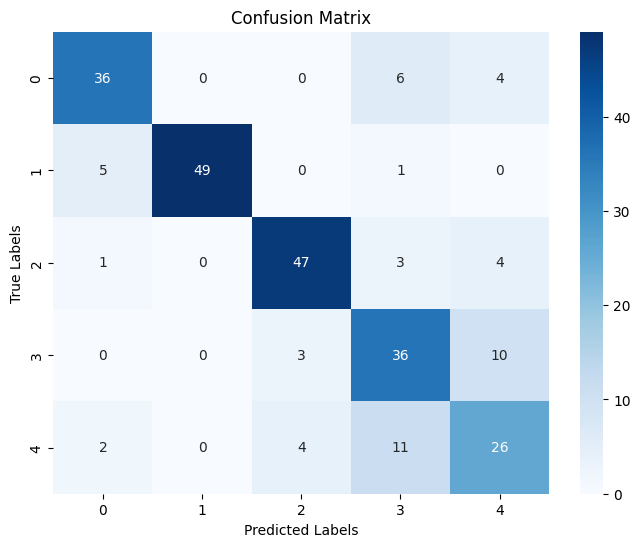

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions for all test images
all_predictions = model.predict(test_x)
# Get the predicted labels
predicted_labels = np.argmax(all_predictions, axis=1)
# Get the true labels
true_labels = np.argmax(test_y, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

